<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/01_DataScienceUsingPython/blob/main/05_PandasInsAndOuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different types of data ("Ins and Outs")

In this file, we will show how to use Pandas to handle different types of datasets, from different formats, and how to save files using different formats. Here, we will focus in the following formats:


*   Json
*   html
*   csv
*   SQL
*   Excel


Data used in this course is from a (fake) programming school, and we will receive data from different sources and try to read and interpret it. 

Additionally, in this file, we will use a number of random-related functions from numpy, such as *permutation( )*, *choice( )*, *exponential( )*, and others

# Reading .json files

First, we will start to work with .json files. Thus, let's get data containing information from our students.

In [3]:
import pandas as pd

names_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f') # Sex: F
names_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m') # Sex: M

Let's look at some of our data

In [4]:
names_f.sample(5)

,nome,regiao,freq,rank,sexo
57,DAIANE,0,243820,58,F
51,JOANA,0,268576,52,F
105,MILENA,0,158435,106,F
151,SEVERINA,0,105892,152,F
56,SUELI,0,243899,57,F


In [5]:
names_m.sample(5)

,nome,regiao,freq,rank,sexo
197,MICHAEL,0,65736,198,M
21,MATEUS,0,583962,22,M
46,LUCIANO,0,335214,47,M
114,ARTHUR,0,125788,115,M
178,DENILSON,0,74095,179,M


Now, let's get some information about our data using *info( )*

In [6]:
names_f.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    200 non-null    object
 1   regiao  200 non-null    int64 
 2   freq    200 non-null    int64 
 3   rank    200 non-null    int64 
 4   sexo    200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [7]:
names_m.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    200 non-null    object
 1   regiao  200 non-null    int64 
 2   freq    200 non-null    int64 
 3   rank    200 non-null    int64 
 4   sexo    200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


Let's get how many students we have in total. We can do this using a variety of methods.

In [8]:
print(f'Number of students: {len(names_f) + len(names_m)}')
print(f'Number of students: {names_f.shape[0] + names_m.shape[0]}')

Number of students: 400
Number of students: 400


We can join our two data sets using *concat( )*. 

In [9]:
names = pd.concat([names_f, names_m])
names.index = [i for i in range(names.shape[0])]
names

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
395,WALTER,0,67207,196,M
396,ARLINDO,0,66669,197,M
397,MICHAEL,0,65736,198,M
398,ALVARO,0,65444,199,M


We can do a similar procedure, but now only capturing one specific column.

In [10]:
names = pd.concat([names_f, names_m])['nome'].to_frame( )
names.index = [i for i in range(names.shape[0])]
names

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
395,WALTER
396,ARLINDO
397,MICHAEL
398,ALVARO


## Including students ID

This time, we will create a random ID for each student. This ID must be different for all students. We may do this using the *numpy* package. The function *permutation( )* function creates a list of size $n$ from 0 to $n$.

In [11]:
import numpy as np

np.random.seed(10) # Defining a seed

num_students = names.shape[0]

names['id_student'] = np.random.permutation(num_students) + 1

names 

,nome,id_student
0,MARIA,333
1,ANA,112
2,FRANCISCA,353
3,ANTONIA,206
4,ADRIANA,57
...,...,...
395,WALTER,370
396,ARLINDO,321
397,MICHAEL,16
398,ALVARO,126


Let's also store the student's e-mail. These can come from two different domains: @emaildomain.com.br and @emailservice.com.br

In [12]:
domains = ['@emaildomain.com.br', '@emailservice.com.br']

# Let's get the e-mail of a student by joining the student's name with one of these two domains

# To choose a random value from a list, we can use the choice( ) function

names['e-mail'] = names['nome'].apply(lambda x : str(x).lower( )+np.random.choice(domains))

In [13]:
names

,nome,id_student,e-mail
0,MARIA,333,maria@emailservice.com.br
1,ANA,112,ana@emaildomain.com.br
2,FRANCISCA,353,francisca@emaildomain.com.br
3,ANTONIA,206,antonia@emaildomain.com.br
4,ADRIANA,57,adriana@emaildomain.com.br
...,...,...,...
395,WALTER,370,walter@emailservice.com.br
396,ARLINDO,321,arlindo@emailservice.com.br
397,MICHAEL,16,michael@emaildomain.com.br
398,ALVARO,126,alvaro@emailservice.com.br


# Reading .html files

Now, let's get the programming courses our students are applying to. For that end, we may get data from a .html file. Here, the table with courses is found at: http://tabela-cursos.herokuapp.com/index.html

In [14]:
courses_list = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')
courses_list

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

Note that, here, we actually have a non-formatted list

In [15]:
type(courses_list)

list

In fact, we have to convert this list to a DataFrame. Actually, this is a list of DataFrames, containing all tables from our .html. Since our .html only had one table, we may simply do:

In [16]:
courses = courses_list[0]

courses

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [17]:
type(courses)

pandas.core.frame.DataFrame

To better handle our courses DataFrame, we can make some small QoL improvements. First, we may change tha column name for course_name. Second, we may create a course ID for each course.

In [18]:
courses.rename(columns = {'Nome do curso':'course_name'}, inplace = True)

courses

,course_name
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [19]:
courses['id'] = np.random.permutation(courses.shape[0]) + 1

courses

,course_name,id
0,Lógica de programação,11
1,Java para Web,7
2,C# para Web,12
3,Ruby on Rails,17
4,Cursos de Python,2
5,PHP com MySql,5
6,.NET para web,16
7,Novas integrações com Java,18
8,TDD com Java,15
9,Código limpo com C#,13


Now, let's turn our id as our DataFrame index!

In [20]:
courses.set_index('id', inplace = True)
courses

,course_name
id,
11,Lógica de programação
7,Java para Web
12,C# para Web
17,Ruby on Rails
2,Cursos de Python
5,PHP com MySql
16,.NET para web
18,Novas integrações com Java
15,TDD com Java


Let's now add to our former dataframe the number of courses each student is enrolled in.

We can make this using a random function. Usually, many students are enrolled in few courses, and few students are enrolled in a lot of courses. Thus, we can assume that these follow an exponential distribution.

In [21]:
names['num_courses'] = np.random.exponential(size = num_students).astype(int) # astype(int) makes it so that all numbers are integers

names

,nome,id_student,e-mail,num_courses
0,MARIA,333,maria@emailservice.com.br,1
1,ANA,112,ana@emaildomain.com.br,0
2,FRANCISCA,353,francisca@emaildomain.com.br,0
3,ANTONIA,206,antonia@emaildomain.com.br,0
4,ADRIANA,57,adriana@emaildomain.com.br,0
...,...,...,...,...
395,WALTER,370,walter@emailservice.com.br,0
396,ARLINDO,321,arlindo@emailservice.com.br,0
397,MICHAEL,16,michael@emaildomain.com.br,0
398,ALVARO,126,alvaro@emailservice.com.br,1


Note that, in many cases, we had some students enrolled in 0 courses. To fix this, we can use the *ceil( )* function.

In [22]:
names['num_courses'] = np.ceil(np.random.exponential(size = num_students)).astype(int)
names

,nome,id_student,e-mail,num_courses
0,MARIA,333,maria@emailservice.com.br,1
1,ANA,112,ana@emaildomain.com.br,2
2,FRANCISCA,353,francisca@emaildomain.com.br,2
3,ANTONIA,206,antonia@emaildomain.com.br,1
4,ADRIANA,57,adriana@emaildomain.com.br,1
...,...,...,...,...
395,WALTER,370,walter@emailservice.com.br,2
396,ARLINDO,321,arlindo@emailservice.com.br,3
397,MICHAEL,16,michael@emaildomain.com.br,1
398,ALVARO,126,alvaro@emailservice.com.br,1


Let's understand how our distribution ended up being.

In [23]:
names.num_courses.describe( )

count    400.000000
mean       1.585000
std        0.913708
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: num_courses, dtype: float64

(array([249.,   0.,  93.,   0.,  42.,   0.,   8.,   0.,   7.,   1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

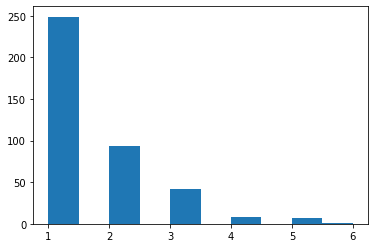

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure( )

plt.hist(names.num_courses)

We can also make this graph using the *seaborn* package. This package is able to improve visualization of our data!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


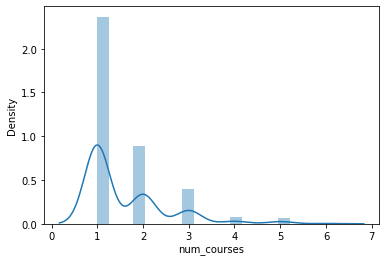

In [25]:
import seaborn as sns

sns.distplot(names.num_courses)

Let's also see how many students we have enrolled in 1, 2, 3... courses

In [26]:
names.num_courses.value_counts( )

1    249
2     93
3     42
4      8
5      7
6      1
Name: num_courses, dtype: int64

Now, we are going to create a column with the courses each student is enrolled in.

In [27]:
names['courses'] = names['num_courses'].apply(lambda x : np.random.choice(courses['course_name'], x))

In [28]:
names

,nome,id_student,e-mail,num_courses,courses
0,MARIA,333,maria@emailservice.com.br,1,[Análise de dados]
1,ANA,112,ana@emaildomain.com.br,2,"[Persistência com .NET, Orientação objetos com..."
2,FRANCISCA,353,francisca@emaildomain.com.br,2,"[Preparatório para certificação Java, C# para ..."
3,ANTONIA,206,antonia@emaildomain.com.br,1,[Estatística básica]
4,ADRIANA,57,adriana@emaildomain.com.br,1,[Boas práticas em Java]
...,...,...,...,...,...
395,WALTER,370,walter@emailservice.com.br,2,"[Programação funcional, .NET para web]"
396,ARLINDO,321,arlindo@emailservice.com.br,3,"[Estatística básica, Boas práticas em Java, Ló..."
397,MICHAEL,16,michael@emaildomain.com.br,1,[Preparatório para certificação Java]
398,ALVARO,126,alvaro@emailservice.com.br,1,[Java para Web]


To allow for a better understanding over these courses, we can also create a new DataFrame with only the students id and the courses the student is enrolled in, as in:

In [29]:
list_id      = []
list_courses = []

for i in range(names.shape[0]):
  for c in names['courses'].iloc[i]:
    list_id.append(names['id_student'].iloc[i])
    list_courses.append(c)

dictionary = {'id_student': list_id, 'course': list_courses}
stud_courses = pd.DataFrame(dictionary)

In [30]:
stud_courses

,id_student,course
0,333,Análise de dados
1,112,Persistência com .NET
2,112,Orientação objetos com Java
3,353,Preparatório para certificação Java
4,353,C# para Web
...,...,...
629,321,Boas práticas em Java
630,321,Lógica de programação
631,16,Preparatório para certificação Java
632,126,Java para Web


Now, we can group by courses, and see, for instance, how many students are enrolled in each couse

In [31]:
group_course = stud_courses.groupby('course')

In [32]:
count_course = group_course.count( )
count_course

,id_student
course,
.NET para web,25
Análise de dados,41
Boas práticas em Java,35
C# para Web,34
Cursos de Python,26
Código limpo com C#,33
Desenvolvendo jogos,32
Estatística básica,25
Hardware básico,30


Let's improve visualization of our DataFrame

In [33]:
count_course.rename(columns = {'id_student':'num_students'}, inplace = True)

count_course

,num_students
course,
.NET para web,25
Análise de dados,41
Boas práticas em Java,35
C# para Web,34
Cursos de Python,26
Código limpo com C#,33
Desenvolvendo jogos,32
Estatística básica,25
Hardware básico,30


# Writing on different outputs

We saw how to read data from .json and .html files. Now, let's see how to write data on different formats.

First, using .csv files, we can only use function *to_csv( )*

In [34]:
count_course.to_csv('num_students_courses.csv', index = True)

Let's see our .csv file

In [35]:
pd.read_csv('num_students_courses.csv')

,course,num_students
0,.NET para web,25
1,Análise de dados,41
2,Boas práticas em Java,35
3,C# para Web,34
4,Cursos de Python,26
5,Código limpo com C#,33
6,Desenvolvendo jogos,32
7,Estatística básica,25
8,Hardware básico,30
9,Internet das coisas,25


We can also export our data as a .json file

In [36]:
count_json = count_course.to_json( )
count_json

'{"num_students":{".NET para web":25,"An\\u00e1lise de dados":41,"Boas pr\\u00e1ticas em Java":35,"C# para Web":34,"Cursos de Python":26,"C\\u00f3digo limpo com C#":33,"Desenvolvendo jogos":32,"Estat\\u00edstica b\\u00e1sica":25,"Hardware b\\u00e1sico":30,"Internet das coisas":25,"Java para Web":27,"L\\u00f3gica de programa\\u00e7\\u00e3o":33,"Novas integra\\u00e7\\u00f5es com Java":33,"Orienta\\u00e7\\u00e3o objetos com Java":34,"PHP com MySql":24,"Persist\\u00eancia com .NET":32,"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java":44,"Programa\\u00e7\\u00e3o funcional":29,"Ruby on Rails":48,"TDD com Java":24}}'

Finally, we can also export our data as a .html file

In [37]:
count_html = count_course.to_html( )
count_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>num_students</th>\n    </tr>\n    <tr>\n      <th>course</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>.NET para web</th>\n      <td>25</td>\n    </tr>\n    <tr>\n      <th>Análise de dados</th>\n      <td>41</td>\n    </tr>\n    <tr>\n      <th>Boas práticas em Java</th>\n      <td>35</td>\n    </tr>\n    <tr>\n      <th>C# para Web</th>\n      <td>34</td>\n    </tr>\n    <tr>\n      <th>Cursos de Python</th>\n      <td>26</td>\n    </tr>\n    <tr>\n      <th>Código limpo com C#</th>\n      <td>33</td>\n    </tr>\n    <tr>\n      <th>Desenvolvendo jogos</th>\n      <td>32</td>\n    </tr>\n    <tr>\n      <th>Estatística básica</th>\n      <td>25</td>\n    </tr>\n    <tr>\n      <th>Hardware básico</th>\n      <td>30</td>\n    </tr>\n    <tr>\n      <th>Internet das coisas</th>\n      <td>25</td>\n    </tr>\n    <tr>\n      <th>Java para Web</

# Importing from an SQL database

Now, we will import from (and export to) an SQL database. When dealing with large datasets, this is usually the format companies work with.

This can be done usng the sqlalchemy library by creating an engine

In [38]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [39]:
type(engine)

sqlalchemy.engine.base.Engine

Then, we can export to an SQL database using the *to_sql( )* method.

In [40]:
count_course.to_sql('students_course', engine)

We can read our table names printing from the engine as in:

In [41]:
inspector = inspect(engine)        # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['students_course']


To search from our SQL database, we may use a query

In [44]:
query = 'select * from students_course where num_students < 30'

In [45]:
pd.read_sql(query, engine)

,course,num_students
0,.NET para web,25
1,Cursos de Python,26
2,Estatística básica,25
3,Internet das coisas,25
4,Java para Web,27
5,PHP com MySql,24
6,Programação funcional,29
7,TDD com Java,24


To get the entire SQL database, we can simply use *read_sql_table( )*

In [49]:
sql_df = pd.read_sql_table('students_course', engine)

sql_df

,course,num_students
0,.NET para web,25
1,Análise de dados,41
2,Boas práticas em Java,35
3,C# para Web,34
4,Cursos de Python,26
5,Código limpo com C#,33
6,Desenvolvendo jogos,32
7,Estatística básica,25
8,Hardware básico,30
9,Internet das coisas,25


After reading from the SQL table, we can use Pandas own query method:

In [50]:
sql_df.query('num_students < 30')

,course,num_students
0,.NET para web,25
4,Cursos de Python,26
7,Estatística básica,25
9,Internet das coisas,25
10,Java para Web,27
14,PHP com MySql,24
17,Programação funcional,29
19,TDD com Java,24


Another way of doing the same thing:

In [51]:
sql_df[sql_df['num_students'] < 30]

,course,num_students
0,.NET para web,25
4,Cursos de Python,26
7,Estatística básica,25
9,Internet das coisas,25
10,Java para Web,27
14,PHP com MySql,24
17,Programação funcional,29
19,TDD com Java,24


## Writing on an SQL database

In [52]:
sql_df.to_sql('more_students_course', con = engine)

In [54]:
print(inspect(engine).get_table_names( ))

['more_students_course', 'students_course']


# Exporting to Excel format

Finally, we will see how to export to the excel format (.xlsx)

First, let's see which students will attend to the course "Cursos de Python"

In [63]:
course_python = 'Cursos de Python'

next_year_students = stud_courses[stud_courses['course'] == course_python]
next_year_students


,id_student,course
27,66,Cursos de Python
36,281,Cursos de Python
56,174,Cursos de Python
137,70,Cursos de Python
177,115,Cursos de Python
217,270,Cursos de Python
232,212,Cursos de Python
246,168,Cursos de Python
248,168,Cursos de Python
282,295,Cursos de Python


However, instead of the student's id, we want to see the student's name! For that end, we may use *join( )*

In [65]:
next_year_students.set_index('id_student', inplace = True)
next_year_students

,course
id_student,
66,Cursos de Python
281,Cursos de Python
174,Cursos de Python
70,Cursos de Python
115,Cursos de Python
270,Cursos de Python
212,Cursos de Python
168,Cursos de Python
168,Cursos de Python


Now, let's join this table with the former table, containing the student's name and id. First, we have to assure that the students id is the index on the former table. Also, we just want to get the students name!

In [70]:
next_year_students = next_year_students.join(names[['nome', 'id_student']].set_index('id_student'))

In [71]:
next_year_students

,course,nome
id_student,,
8,Cursos de Python,DIEGO
29,Cursos de Python,THIAGO
64,Cursos de Python,ISADORA
66,Cursos de Python,LUCIANA
70,Cursos de Python,CELIA
85,Cursos de Python,EDUARDO
90,Cursos de Python,NIVALDO
115,Cursos de Python,IRENE
117,Cursos de Python,GUILHERME


Finally, let's just change the order of our columns!

In [73]:
next_year_students = next_year_students[['nome', 'course']]
next_year_students

,nome,course
id_student,,
8,DIEGO,Cursos de Python
29,THIAGO,Cursos de Python
64,ISADORA,Cursos de Python
66,LUCIANA,Cursos de Python
70,CELIA,Cursos de Python
85,EDUARDO,Cursos de Python
90,NIVALDO,Cursos de Python
115,IRENE,Cursos de Python
117,GUILHERME,Cursos de Python


Finally, let's export to Excel!

In [74]:
next_year_students.to_excel('next_year.xlsx', index = False)

It is worth to remember that, to read an Excel file, we can simply use:

In [75]:
pd.read_excel('next_year.xlsx')

,nome,course
0,DIEGO,Cursos de Python
1,THIAGO,Cursos de Python
2,ISADORA,Cursos de Python
3,LUCIANA,Cursos de Python
4,CELIA,Cursos de Python
5,EDUARDO,Cursos de Python
6,NIVALDO,Cursos de Python
7,IRENE,Cursos de Python
8,GUILHERME,Cursos de Python
9,VALTER,Cursos de Python
